In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
df = pd.read_csv('/Users/deepanshu/Downloads/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [4]:
df.drop(['society'],axis='columns',inplace=True)
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [5]:
df1 = df.dropna()
df1.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [6]:
df1.shape

(12710, 8)

In [7]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [8]:
location_stats = df1.groupby('area_type')['area_type'].agg('count').sort_values(ascending =False)
location_stats

area_type
Super built-up  Area    8481
Built-up  Area          2310
Plot  Area              1837
Carpet  Area              82
Name: area_type, dtype: int64

In [9]:
df1['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-Feb', '18-Nov', '18-May', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '16-Jul', '15-Jun', '20-Nov', '20-Jul',
       '16-Sep', '20-Feb', '15-Dec', '16-Oct', '22-Nov', '15-Aug',
       '17-Jan', '16-Nov', '20-Apr', '16-Jan', '17-Feb', '14-Jul'],
      dtype=object)

In [10]:
df1.availability= df1.availability.apply(lambda x: 1 if x == 'Ready To Move' else 0)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,1,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,1,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [12]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,0,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
122,Super built-up Area,0,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,0,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
165,Super built-up Area,0,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490
188,Super built-up Area,1,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800
410,Super built-up Area,1,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500
549,Super built-up Area,0,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770
661,Super built-up Area,1,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130
672,Built-up Area,0,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000
772,Super built-up Area,0,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935


In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
df2 = df1.copy()
df2['total_sqft'] = df2['total_sqft'].apply(convert_sqft_to_num)
df2.head(3)

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07
1,Plot Area,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00
2,Built-up Area,1,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00


In [17]:
df3 =df2.copy()

In [18]:
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,1,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,1,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,1,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000


In [19]:
len(df3.location.unique())

1265

In [20]:
df3.location = df3.location.apply(lambda x: x.strip())

location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending =False)
location_stats

location
Whitefield                              515
Sarjapur  Road                          372
Electronic City                         302
Kanakpura Road                          261
Thanisandra                             234
                                       ... 
Kodanda Reddy Layout                      1
Kirloskar layout, Basaveshwarnagar        1
Kengeri Satellite Town Stage II           1
Kengeri Satellite Town KHB Apartment      1
1 Annasandrapalya                         1
Name: location, Length: 1254, dtype: int64

In [21]:
len(location_stats[location_stats<=10])

1017

In [22]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Kalkere                                 10
Dairy Circle                            10
1st Block Koramangala                   10
Ganga Nagar                             10
Basapura                                10
                                        ..
Kodanda Reddy Layout                     1
Kirloskar layout, Basaveshwarnagar       1
Kengeri Satellite Town Stage II          1
Kengeri Satellite Town KHB Apartment     1
1 Annasandrapalya                        1
Name: location, Length: 1017, dtype: int64

In [23]:
len(df3.location.unique())

1254

In [24]:
df3.location = df3.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
len(df3.location.unique())

238

In [25]:
df3.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,1,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,1,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,1,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000
5,Super built-up Area,1,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,3247.863248
8,Super built-up Area,1,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,4828.244275
10,Super built-up Area,0,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3888.888889
11,Plot Area,1,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,10592.459605
12,Super built-up Area,1,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,3800.000000


In [26]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [27]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,price_per_sqft,bhk
0,Super built-up Area,0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606,2
1,Plot Area,1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4615.384615,4
2,Built-up Area,1,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556,3
3,Super built-up Area,1,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861,3
4,Super built-up Area,1,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000,2


In [28]:
df3.drop(['size'],axis='columns',inplace=True)
df3.head()

,area_type,availability,location,total_sqft,bath,balcony,price,price_per_sqft,bhk
0,Super built-up Area,0,Electronic City Phase II,1056.0,2.0,1.0,39.07,3699.810606,2
1,Plot Area,1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4615.384615,4
2,Built-up Area,1,Uttarahalli,1440.0,2.0,3.0,62.00,4305.555556,3
3,Super built-up Area,1,Lingadheeranahalli,1521.0,3.0,1.0,95.00,6245.890861,3
4,Super built-up Area,1,Kothanur,1200.0,2.0,1.0,51.00,4250.000000,2


# Outlier Removal

In [29]:
df3[df3.total_sqft/df3.bhk<300].head()

,area_type,availability,location,total_sqft,bath,balcony,price,price_per_sqft,bhk
58,Plot Area,1,Murugeshpalya,1407.0,4.0,1.0,150.0,10660.980810,6
68,Plot Area,1,Devarachikkanahalli,1350.0,7.0,0.0,85.0,6296.296296,8
70,Plot Area,1,other,500.0,3.0,2.0,100.0,20000.000000,3
78,Built-up Area,1,Kaval Byrasandra,460.0,1.0,0.0,22.0,4782.608696,2
89,Plot Area,1,Rajaji Nagar,710.0,6.0,3.0,160.0,22535.211268,6


In [30]:
df3.shape

(12710, 9)

In [31]:
df4 = df3[~(df3.total_sqft/df3.bhk<300)]
df4.shape

(12055, 9)

In [32]:
df4.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(9848, 9)

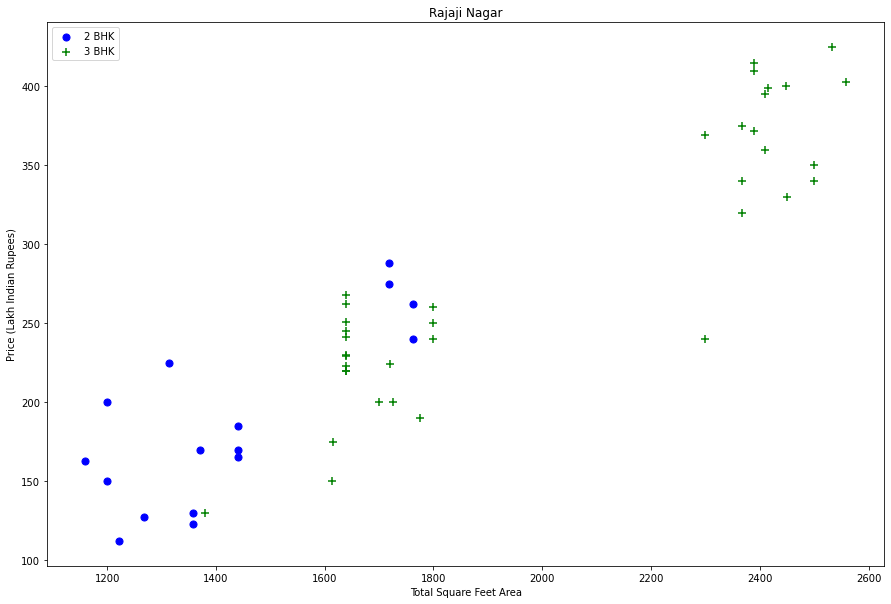

In [34]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

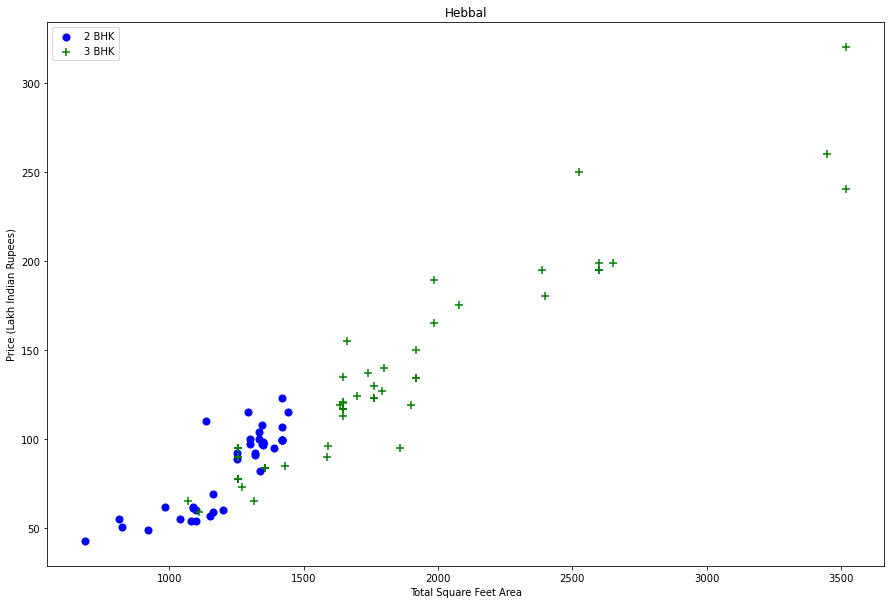

In [35]:
plot_scatter_chart(df5,"Hebbal")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}



Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
df6.shape

(7025, 9)

Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties

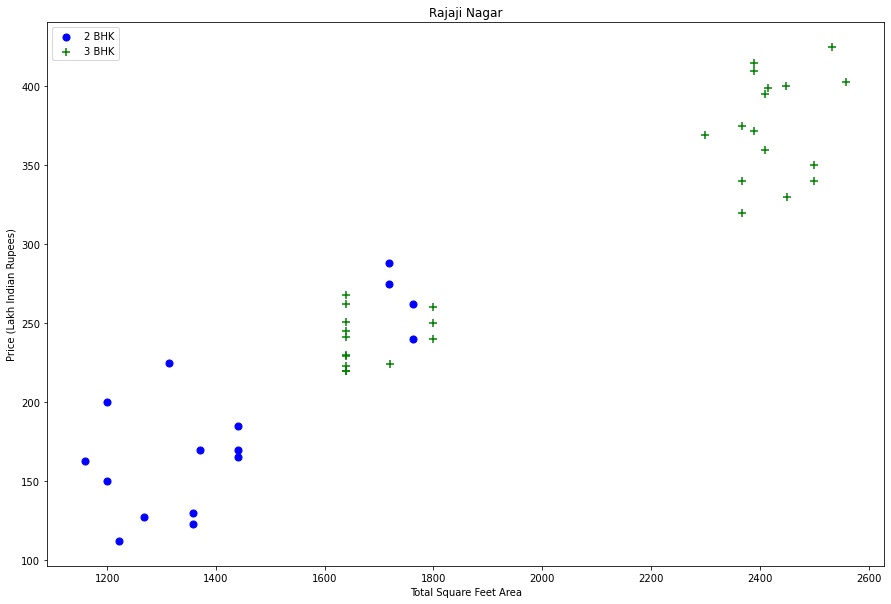

In [37]:
plot_scatter_chart(df6,"Rajaji Nagar")

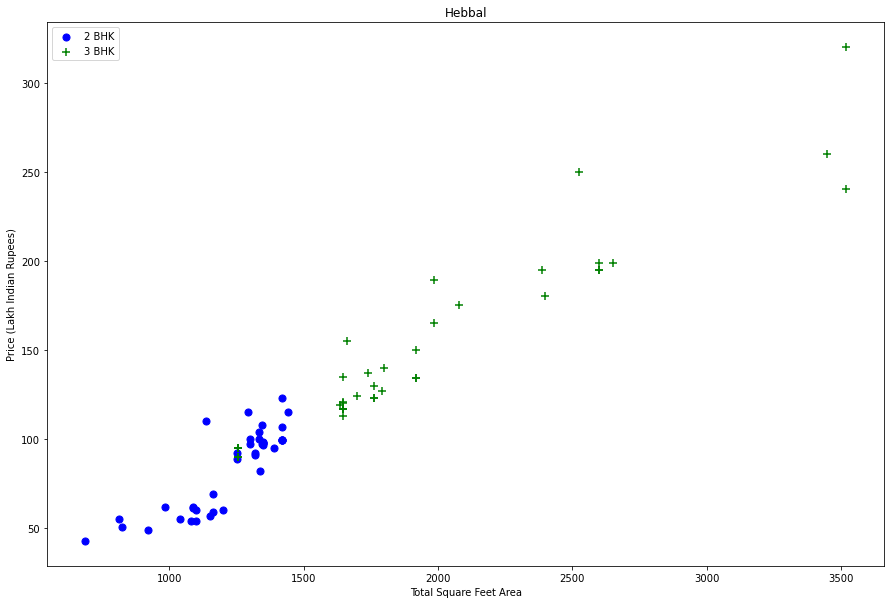

In [38]:
plot_scatter_chart(df6,"Hebbal")

Text(0, 0.5, 'Count')

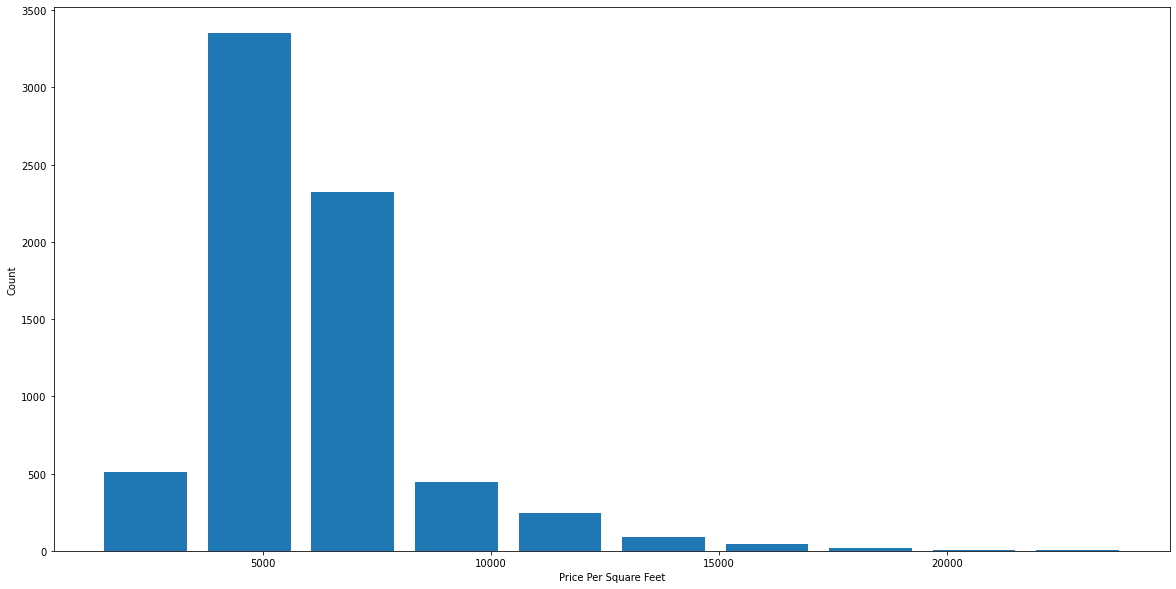

In [39]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


# Outlier Removal Using Bathrooms Feature

In [40]:
df6.bath.unique()

array([ 4.,  3.,  2.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

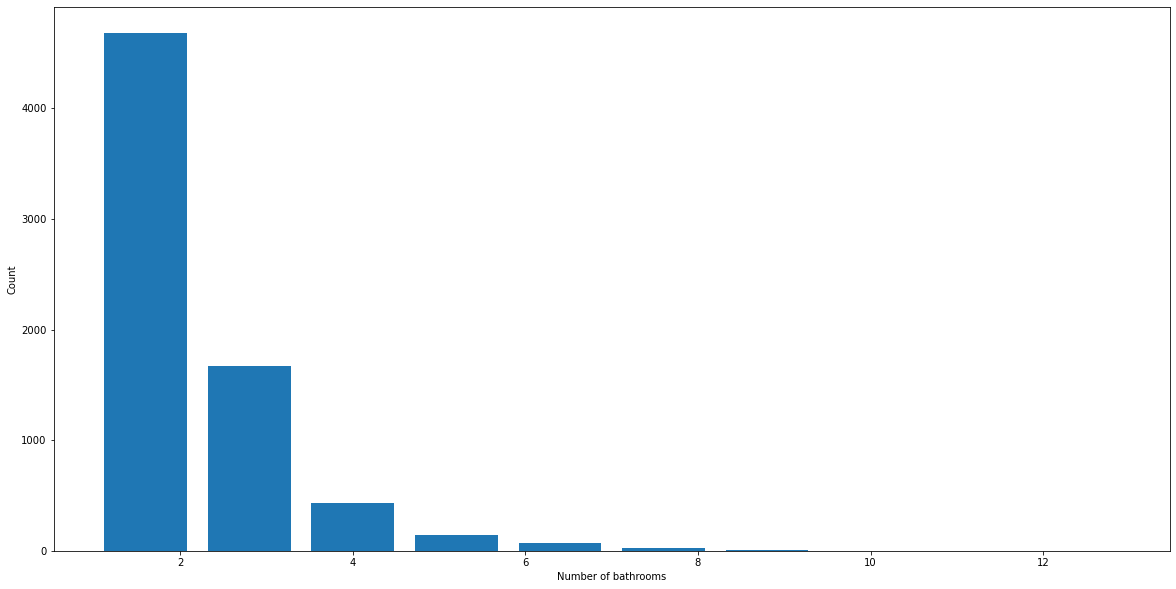

In [41]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [42]:
df6[df6.bath>10]

,area_type,availability,location,total_sqft,bath,balcony,price,price_per_sqft,bhk
9269,Super built-up Area,1,other,5425.0,13.0,0.0,275.0,5069.124424,13


In [43]:
df6[df6.bath>df6.bhk+2]

,area_type,availability,location,total_sqft,bath,balcony,price,price_per_sqft,bhk
1542,Built-up Area,1,Chikkabanavar,2460.0,7.0,2.0,80.0,3252.032520,4
6450,Super built-up Area,1,Thanisandra,1806.0,6.0,2.0,116.0,6423.034330,3
8091,Super built-up Area,1,other,11338.0,9.0,1.0,1000.0,8819.897689,6


In [44]:
df7 = df6[df6.bath<df6.bhk+2]
df7.shape

(6958, 9)

In [45]:
df7.head(2)

,area_type,availability,location,total_sqft,bath,balcony,price,price_per_sqft,bhk
0,Super built-up Area,0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,15017.543860,4
1,Super built-up Area,0,1st Block Jayanagar,1630.0,3.0,2.0,194.0,11901.840491,3


In [46]:
df8 = df7.drop(['price_per_sqft'],axis='columns')
df8.head(4)

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,0,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,Built-up Area,0,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3


# Use One Hot Encoding For Location & Area Type

In [47]:
dummies = pd.get_dummies(df8.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df9 = pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
df9.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,0,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,0,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,0,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df9.drop(['location'],axis='columns',inplace=True)
df9.head()

,area_type,availability,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,0,2850.0,4.0,1.0,428.0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,0,1630.0,3.0,2.0,194.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1,1875.0,2.0,3.0,235.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,0,1200.0,2.0,0.0,130.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,0,1235.0,2.0,2.0,148.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
ndummies = pd.get_dummies(df9.area_type)
ndummies.head()

,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1


In [51]:
ndummies.columns = ['Built_Up','Carpet','Plot','Suoer_Built_Up']

In [52]:
ndummies.head()

,Built_Up,Carpet,Plot,Suoer_Built_Up
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1


In [53]:
df10 = pd.concat([df9,ndummies.drop('Suoer_Built_Up',axis='columns')],axis='columns')
df10.head()

,area_type,availability,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built_Up,Carpet,Plot
0,Super built-up Area,0,2850.0,4.0,1.0,428.0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,0,1630.0,3.0,2.0,194.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1,1875.0,2.0,3.0,235.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,0,1200.0,2.0,0.0,130.0,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Super built-up Area,0,1235.0,2.0,2.0,148.0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df10.drop(['area_type'],axis='columns',inplace=True)
df10.head()

,availability,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built_Up,Carpet,Plot
0,0,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step Forward Feature Selection

In [55]:
X = df10.drop(['price'],axis='columns')
X.head(3)

,availability,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built_Up,Carpet,Plot
0,0,2850.0,4.0,1.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1630.0,3.0,2.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1875.0,2.0,3.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y = df10.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [58]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [59]:
sfs = SFS(LinearRegression(),
          k_features=245,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [60]:
sfs.fit(X, y)
selected_features = sfs.k_feature_names_ 
score = sfs.scoring

In [61]:
len(selected_features)

245

# Building a Model Now

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [63]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8603177896223246

# Use K Fold cross validation to measure accuracy of our LinearRegression model


In [64]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87845565, 0.8459702 , 0.7834952 , 0.89757189, 0.8727054 ])

We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

# Find best model using GridSearchCV

In [65]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.855640,{'normalize': True}
1,lasso,0.698413,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.762728,"{'criterion': 'mse', 'splitter': 'best'}"


Based on above results we can say that LinearRegression gives the best score. Hence we will use that.

# Test the model for few properties


In [66]:
def predict_price(location,availability,total_sqft,bath,balcony,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = availability
    x[1] = total_sqft
    x[2] = bath
    x[3] = balcony
    x[4] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [67]:
predict_price('1st Phase JP Nagar',1,1000, 2, 2,3)

89.88338218481208

In [68]:
predict_price('Indira Nagar',0 , 1500, 2 ,1, 3)

209.6119477117577

# Export the tested model to a pickle file

In [69]:
import pickle
with open('pridict_bidding.pickle','wb') as f:
    pickle.dump(lr_clf,f)

#  Export location and column information to a file that will be useful later on in our prediction application

In [70]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))